In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Loading DataSet
df = pd.read_csv('LondonBikeJourneyAug2023.csv')

In [3]:
# Looking that how Much Values are in Our Dataset
df.shape

(776527, 11)

In [4]:
# Checking Dtype and Null Values in Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB


In [5]:
# Simply Looking for Null Values
df.isnull().sum()

Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
dtype: int64

# Preprocessing

In [6]:
df.head(5)

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786


In [7]:
df['Bike model'].value_counts()

Bike model
CLASSIC       716639
PBSC_EBIKE     59888
Name: count, dtype: int64

In [8]:
# Replacing the PBSC_EBIKE with just EBIKE
df['Bike model'].replace({'CLASSIC': '1','PBSC_EBIKE': '0'},inplace = True)

In [9]:
df.sample(3
         )

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
225139,133057055,8/10/2023 9:06,300062,"South Bermondsey Station, Bermondsey",8/10/2023 9:19,200193,"Snowsfields, London Bridge",57698,1,12m 43s,763304
195394,133026480,8/9/2023 10:34,1176,"Waterloo Road, South Bank",8/9/2023 10:59,1204,"Queen's Gate (North), Kensington",24231,1,24m 47s,1487610
241547,133073970,8/10/2023 18:34,300221,"Battersea Power Station, Battersea Park",8/10/2023 18:40,1140,"Grosvenor Road, Pimlico",55407,1,6m 48s,408360


In [10]:
df['End station'].value_counts()

End station
Hyde Park Corner, Hyde Park               7414
Waterloo Station 3, Waterloo              4641
Black Lion Gate, Kensington Gardens       4422
Albert Gate, Hyde Park                    4167
Brushfield Street, Liverpool Street       4055
                                          ... 
Ladbroke Grove Central, Ladbroke Grove      98
Sackville Street, Mayfair                   97
Great Suffolk Street, The Borough           55
Mechanical Workshop Clapham                 30
Mechanical Workshop Penton                   5
Name: count, Length: 802, dtype: int64

In [11]:
df['End station'].replace({'Hyde Park Corner, Hyde Park': 'HydePark', 'Waterloo Station 3, Waterloo': 'WaterLooS'
                          , 'Black Lion Gate, Kensington Gardens': 'LionGate',
                          'Albert Gate, Hyde Park':'AlberGate',
                          'Brushfield Street, Liverpool Street':'LiverpoolStreet',
                          'Ladbroke Grove Central, Ladbroke Grove':'LadbrokeGrove',
                          'Sackville Street, Mayfair':'Mayfair',
                          'Great Suffolk Street, The Borough':'TheBorough',
                          'Mechanical Workshop Clapham':'Clapham',
                          'Mechanical Workshop Penton':'Penton'},inplace = True)

In [12]:
df.sample(5)

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
177480,133008101,8/8/2023 17:13,1109,"Wellington Arch, Hyde Park",8/8/2023 17:29,1206,"Montpelier Street, Knightsbridge",20404,1,16m 15s,975521
406778,133244099,8/17/2023 8:03,1135,"Claverton Street, Pimlico",8/17/2023 8:17,300030,"Thorndike Close, West Chelsea",50864,1,13m 38s,818542
96417,132924719,8/4/2023 17:22,200060,"Drayton Gardens, West Chelsea",8/4/2023 17:53,3446,"De Vere Gardens, Kensington",59144,1,30m 31s,1831979
775820,133623847,8/31/2023 22:36,980,"Malet Street, Bloomsbury",8/31/2023 22:49,200132,"Gaywood Street, Elephant & Castle",50503,1,12m 30s,750696
547224,133388524,8/22/2023 17:30,1034,"Bruton Street, Mayfair",8/22/2023 17:46,2698,"Aberdeen Place, St. John's Wood",60472,0,15m 52s,952554


In [13]:
df['End station'].replace({'Hyde Park Corner, Hyde Park': 'HydePark', 'Waterloo Station 3, Waterloo': 'WaterLooS'
                          , 'Black Lion Gate, Kensington Gardens': 'LionGate',
                          'Albert Gate, Hyde Park':'AlberGate',
                          'Brushfield Street, Liverpool Street':'LiverpoolStreet',
                          'Ladbroke Grove Central, Ladbroke Grove':'LadbrokeGrove',
                          'Sackville Street, Mayfair':'Mayfair',
                          'Great Suffolk Street, The Borough':'TheBorough',
                          'Mechanical Workshop Clapham':'Clapham',
                          'Mechanical Workshop Penton':'Penton',
                          'Wormwood Street, Liverpool Street': 'LiverpoolStreet',
                          'Here East South, Queen Elizabeth Olympic Park':'OlympicPark'},inplace = True)

In [14]:
df['Start station'].value_counts()

Start station
Hyde Park Corner, Hyde Park                      7437
Black Lion Gate, Kensington Gardens              4439
Waterloo Station 3, Waterloo                     4185
Albert Gate, Hyde Park                           4169
Wormwood Street, Liverpool Street                3899
                                                 ... 
Here East South, Queen Elizabeth Olympic Park     102
Clapham South, Clapham South                       96
Colet Gardens, Hammersmith                         94
Sackville Street, Mayfair                          66
Great Suffolk Street, The Borough                  60
Name: count, Length: 800, dtype: int64

In [15]:
df.head(1)

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,1,16m 46s,1006663


In [16]:
# Now Working with date Columns
df['date'] = pd.to_datetime(df['Start date'])

In [17]:
df.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),date
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,1,16m 46s,1006663,2023-08-01 00:00:00
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,1,16m 47s,1007128,2023-08-01 00:00:00
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,1,11m 6s,666395,2023-08-01 00:00:00
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,1,11m 53s,713059,2023-08-01 00:01:00
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,1,16m 3s,963786,2023-08-01 00:01:00


In [18]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['date_day'] = df['date'].dt.day

In [19]:
df.sample(2)

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),date,year,month,month_name,date_day
584407,133426899,8/23/2023 19:15,1143,"Kensington Church Street, Kensington",8/23/2023 19:34,1067,"St. James's Square, St. James's",54560,1,18m 55s,1135746,2023-08-23 19:15:00,2023,8,August,23
564056,133405978,8/23/2023 8:38,22160,"Chelsea Bridge, Pimlico",8/23/2023 8:53,1153,"Pall Mall East, West End",58409,1,14m 37s,877774,2023-08-23 08:38:00,2023,8,August,23


In [20]:
df.drop('Start date', axis = 1, inplace = True)

In [21]:
df.sample(1)

,Number,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),date,year,month,month_name,date_day
352063,133187504,1032,"New Inn Yard, Shoreditch",8/15/2023 12:41,22183,"Crinan Street, King's Cross",54260,1,37m 12s,2232786,2023-08-15 12:04:00,2023,8,August,15


In [22]:
# Now Working with date Columns
df['end_date'] = pd.to_datetime(df['End date'])

In [23]:
df.head(2)

,Number,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),date,year,month,month_name,date_day,end_date
0,132825189,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,1,16m 46s,1006663,2023-08-01,2023,8,August,1,2023-08-01 00:17:00
1,132825190,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,1,16m 47s,1007128,2023-08-01,2023,8,August,1,2023-08-01 00:17:00


In [24]:
df['end_year'] = df['date'].dt.year
df['end_month'] = df['date'].dt.month
df['end_month_name'] = df['date'].dt.month_name()
df['end_date_day'] = df['date'].dt.day

In [25]:
df.head(2)

,Number,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),date,year,month,month_name,date_day,end_date,end_year,end_month,end_month_name,end_date_day
0,132825189,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,1,16m 46s,1006663,2023-08-01,2023,8,August,1,2023-08-01 00:17:00,2023,8,August,1
1,132825190,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,1,16m 47s,1007128,2023-08-01,2023,8,August,1,2023-08-01 00:17:00,2023,8,August,1


In [26]:
df.drop(columns = ['End date','date', 'end_date', 'Number','End station number','Bike number'
                  ,'Total duration (ms)', 'Total duration'], inplace = True)

In [27]:
df.head(3)

,Start station number,Start station,End station,Bike model,year,month,month_name,date_day,end_year,end_month,end_month_name,end_date_day
0,1190,"Kennington Lane Rail Bridge, Vauxhall","Albert Embankment, Vauxhall",1,2023,8,August,1,2023,8,August,1
1,1190,"Kennington Lane Rail Bridge, Vauxhall","Albert Embankment, Vauxhall",1,2023,8,August,1,2023,8,August,1
2,983,"Euston Road, Euston","Baldwin Street, St. Luke's",1,2023,8,August,1,2023,8,August,1


In [28]:
df['month_name'].value_counts()

month_name
August    776527
Name: count, dtype: int64

In [29]:
df['month_name'].replace({'August': '8'},inplace = True)
df['end_month_name'].replace({'August': '8'},inplace = True)

In [30]:
df.drop('Start station number', axis = 1, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Start station   776527 non-null  object
 1   End station     776527 non-null  object
 2   Bike model      776527 non-null  object
 3   year            776527 non-null  int32 
 4   month           776527 non-null  int32 
 5   month_name      776527 non-null  object
 6   date_day        776527 non-null  int32 
 7   end_year        776527 non-null  int32 
 8   end_month       776527 non-null  int32 
 9   end_month_name  776527 non-null  object
 10  end_date_day    776527 non-null  int32 
dtypes: int32(6), object(5)
memory usage: 47.4+ MB


In [32]:
df['Bike model'] = df['Bike model'].astype('int32')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Start station   776527 non-null  object
 1   End station     776527 non-null  object
 2   Bike model      776527 non-null  int32 
 3   year            776527 non-null  int32 
 4   month           776527 non-null  int32 
 5   month_name      776527 non-null  object
 6   date_day        776527 non-null  int32 
 7   end_year        776527 non-null  int32 
 8   end_month       776527 non-null  int32 
 9   end_month_name  776527 non-null  object
 10  end_date_day    776527 non-null  int32 
dtypes: int32(7), object(4)
memory usage: 44.4+ MB


# Exploratory Data Analysis

<Axes: xlabel='Bike model'>

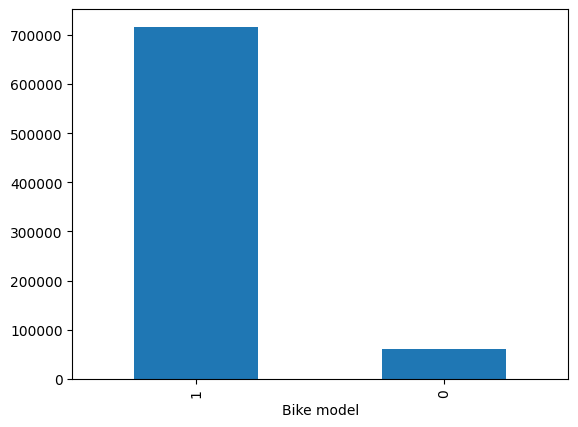

In [34]:
df['Bike model'].value_counts().plot(kind = 'bar')

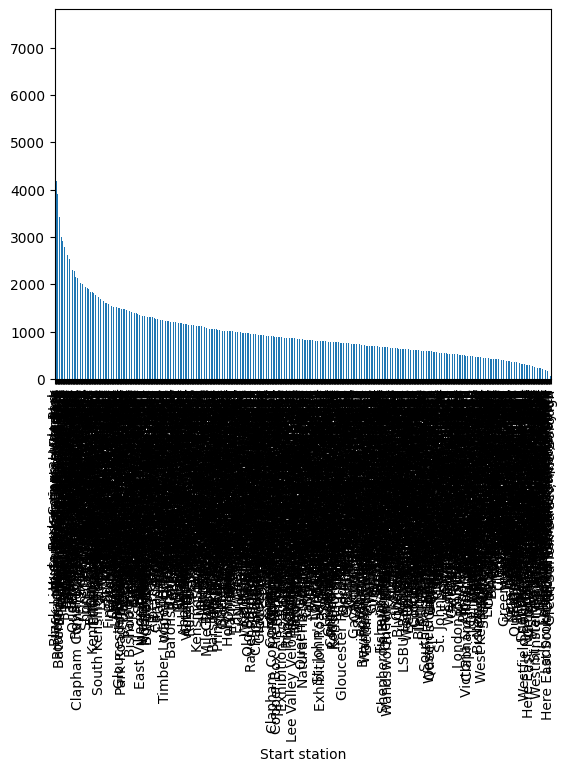

In [35]:
df['Start station'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 'vertical')
plt.show()

In [36]:
X = df.drop(columns =['Bike model'])
y = df['Bike model']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)


In [38]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(handle_unknown = 'ignore',drop= 'first'),[0,1])
],remainder = 'passthrough')

step2 = LogisticRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1])])),
                ('step2', LogisticRegression())])

In [39]:
y_pred = pipe.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: -0.08373689866439671
MAE: 0.07726681519065587


In [40]:
df.sample(1)


,Start station,End station,Bike model,year,month,month_name,date_day,end_year,end_month,end_month_name,end_date_day
494210,"Hartington Road, Stockwell","Tachbrook Street, Victoria",1,2023,8,8,20,2023,8,8,20


In [41]:
pipe.predict([['Ebury Bridge, Pimlico',
               'Vauxhall Cross, Vauxhall','2023','8','8','23','2023','8','8','23']])

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([1])

Ignore the R2 score here as the data was for a time series prediction but we are using it for just The "Bike Model" Prediction that doest'nt make any sense But it was just for practice to master some of steps in ML model;